# 새 섹션

In [6]:
# 로지스틱 회귀
# 로지스틱 회귀란 샘플이 특정 클래스에 속할 확률을 추정하는 것, ex)특정 이메일이 스팸일 확률
# binary에 관한 데이터

# 확률을 추정하는 법
# 선형 회귀 모델과 같이 로지스틱 회귀 모델도 마찬가지로 입력 변수의 가중치 합을 계산한다.
# 대신 선형회귀와 같이 결과물을 연속적인 형태로 출력하는 것이 아니라, 0~1사이의 확률 값을 출력한다.

In [7]:
from sklearn import datasets
iris = datasets.load_iris() # sklearn의 빌트인 iris 예제 로드
print(list(iris.keys()))

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


In [8]:
x = iris['data'][:,3:] # 꽃잎의 너비 변수만 사용
y = (iris['target'] == 2).astype('int') # index2 : versicolor만 사용

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
import numpy as np
import matplotlib.pyplot as plt

x_new = np.linspace(0,3,1000).reshape(-1,1)
# predict VS predict_proba => predict: 예측 라벨값 산출, predict_proba: 예측 확률 값 산출
x_new.shape # y값이 하나
y_proba = log_reg.predict_proba(x_new)
y_proba.shape # y값이 두개 왜? 맞다 아니다 판단하는 2가지 경우가 존재해서
plt.plot(x_new, y_proba[:,1], "r-", label = "Iris-Virginica")
plt.plot(x_new, y_proba[:,0], "b--", label = "not Iris-Virginica")
plt.legend()
,plt.show()

AttributeError: ignored

In [12]:
# 소프트맥스 회귀(다항 로지스틱 회귀)
# categorical한 데이터
# 추정 확률 값이 가장 높은 클래스를 실제 클래스라고 ㅎ에측함

x = iris['data'][:,(2,3)] # 꽃잎의 길이, 너비 변수 사용
y = iris['target'] # 3개 클래스 모두 사용

# multi class 역시 sklearn의 logisticregression 사용
# multi_class = 'multinomial' 옵션으로 소프트맥트 회귀를 사용할 수 있음
# solver = 'lbfgs'의 lbfgs는 의사 뉴턴 메서드 중, 제한된 메모리 공간에서 구현한 것으로 머신러닝 분야에서 많이 사용 됨
# 하이퍼파라미터 C를 통해, 이전 장에서 배운 L2 규제를 사용하게 됨 (릿지 회귀)
softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10,random_state=2021)
softmax_reg.fit(x,y)

# 꽃잎 길이 5cm, 너비 2cm의 iris 데이터를 예측한다고 가정
new_iris = [[5,2]]
# predict VS predict_proba => predict: 예측 라벨값 산출, predict_proba: 예측 확률 값 산출
prediction = softmax_reg.predict(new_iris)[0]
label = iris['target_names'].tolist()
print(label[prediction])
softmax_reg.predict_proba(new_iris)

virginica


array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [23]:
# 서포트 벡터 머신(SVM)
# 선형이나 비선형 분류, 회귀 이상치 탐색에 사용할 수 있는 다목적 머신러닝 모델
# 복잡한 분류 문제에 잘 맞고, 작거나 중간 크기의 데이터셋에 적합하다.
# 특성 스케일에 아무 민감하다. 

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
x = iris['data'][:,(2,3)] # 꽃잎 길이와 너비
y = (iris['target']==2).astype('int')

svm_clf = Pipeline([
                    ('scale', StandardScaler()),
                    ('linear_svc', LinearSVC(C=1,loss='hinge'))
])

# 모델 훈련
svm_clf.fit(x,y)\

# 예측
new_iris = [[5.5,1.7]] # 길이 : 5.5cm , 너비 : 1.7
prediction = svm_clf.predict(new_iris)[0]
print(prediction)

1


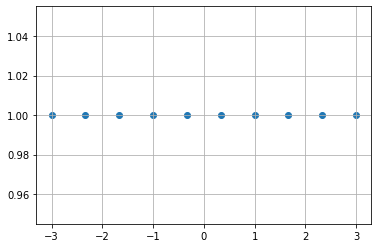

In [26]:
# 비선형 SVM 분류

import matplotlib.pyplot as plt
x = np.linspace(-3,3,10)
y = np.linspace(1,1,10)
plt.scatter(x,y)
plt.grid()
plt.show()

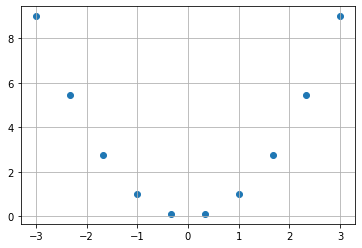

In [28]:
b_func = x**2
plt.scatter(x,b_func)
plt.grid()
plt.show()

In [44]:
# 비선협 SVM => 예제 : make_moons
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

# 샘플 수 1000개, noise = 0.1, random_state = 2021
x,y = make_moons(n_samples=1000, noise=0.1, random_state=2021)

# 변수 변환 : polynomial 3차 다항식, scaler : standardscaler 모델 : linearSVC
polynomial_std_svm = Pipeline([
                               ("polynomial", PolynomialFeatures(degree=3)),
                               ('std', StandardScaler()),
                               ('svm', LinearSVC(C=10, loss='hinge'))
])

# 모델 학습
polynomial_std_svm.fit(x,y)

# 예측
new_moon = [[2.0,1.0]]
polynomial_std_svm.predict(new_moon)[0]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1

In [50]:
# SVM 다항식 커널
# 다항식 특성(PolynomialFeatures)을 추가하는 것처럼 간단하고 모든 머신러닝 알고리즘에서 잘 동작한다.
# 하지만 낮은 차수의 다항식은 복잡한 모델을 표현하기 쉽지 않기 때문에, 굉장히 많은 차수를 사용하여서 모델을 학습해야한다.
# 그런데 많은 차수를 사용한 모델은 학습속도를 무시무시하게 떨어트리고 심지어 동작 자체를 안하는 경우도 있다.
# 데이터 변환을 통해 비선형적인 데이터를 분류를 하고 싶고, 모델 학습에도 지장을 주지 않는 효율적인 방법은 없을까라는 고민끝에, SVM을 사용할 땐 kernel trick이라는 수학적 기교를 사용할 수 있다.
# 실제로 특성을 추가하지 않았음에도, 다항식 특성을 많이 추가한 것과 같은 결과를 얻을 수 있다.

from sklearn.svm import SVC
poly_kernel_std_svm = Pipeline([
                                ('std', StandardScaler()),
                                ('poly_kernal_svm', SVC(kernel = 'poly', degree=3,coef0=1, C=5))
])
poly_kernel_std_svm.fit(x,y)

Pipeline(memory=None,
         steps=[('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly_kernal_svm',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [53]:
# SVM 가우시안 RBF 커널
# 다항 특성 방식과 마찬가지로 유사도 특성 방식을 모델에 적용할 수 있다.
# 다항식 커널에서 말한 것과 같이 추가 특성을 계산하려면 엄청난 시간과 비용이 발생한다. (특히 훈련 세트가 클 경우 심해짐)
# 하지만 마찬가지로 커널 트릭 방식을 사용하면, 실제 특성을 추가하지 않고 유사도 특성을 많이 추가한 것과 같은 효과를 얻을 수 있다.

rbf_kernel_std_svm  = Pipeline([
                               ('std', StandardScaler()),
                              ('rbf_kernal_svm', SVC(kernel = 'rbf', gamma=3, C=0.001))
])
rbf_kernel_std_svm.fit(x,y)                           

Pipeline(memory=None,
         steps=[('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rbf_kernal_svm',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=3,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)